In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
IMAGE_SIZE = [400, 200]

train_path = "/content/drive/My Drive/Dataset/Train"
valid_path = "/content/drive/My Drive/Dataset/Test"



inceptionresnetv2= InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inceptionresnetv2.layers:
  layer.trainable = False

folders = glob("/content/drive/My Drive/Dataset/Train/*")

##new layers
x = Flatten()(inceptionresnetv2.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inceptionresnetv2.input, outputs=prediction)
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy')

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,target_size = (400, 200),batch_size = 32,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,target_size = (400, 200),batch_size = 32,class_mode = 'categorical')


219055592/219055592 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400, 200, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 199, 99, 32)          864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 199, 99, 32)          96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)   

In [6]:
# fit the model
r = model.fit(training_set,validation_data=test_set,epochs=5,
              steps_per_epoch=len(training_set)
              ,validation_steps=len(test_set))

Epoch 1/5
27/27 [==============================] - 229s 8s/step - loss: 3.5469 - accuracy: 0.7647 - val_loss: 0.0088 - val_accuracy: 0.9941
Epoch 2/5
27/27 [==============================] - 22s 815ms/step - loss: 0.1517 - accuracy: 0.9824 - val_loss: 0.0150 - val_accuracy: 0.9941
Epoch 3/5
27/27 [==============================] - 22s 828ms/step - loss: 0.0114 - accuracy: 0.9988 - val_loss: 1.5217e-07 - val_accuracy: 1.0000
Epoch 4/5
27/27 [==============================] - 21s 793ms/step - loss: 1.7699e-04 - accuracy: 1.0000 - val_loss: 2.0055e-07 - val_accuracy: 1.0000
Epoch 5/5
27/27 [==============================] - 21s 802ms/step - loss: 0.0043 - accuracy: 0.9976 - val_loss: 1.8933e-08 - val_accuracy: 1.0000


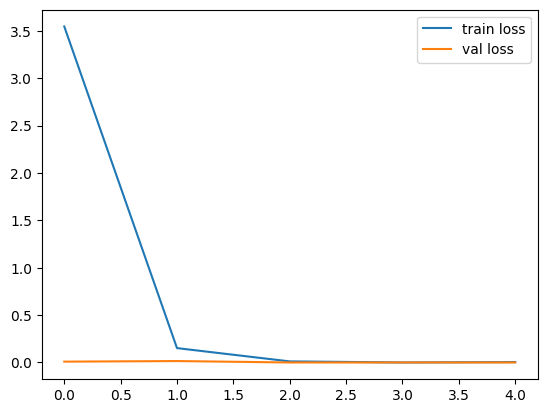

<Figure size 640x480 with 0 Axes>

In [7]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

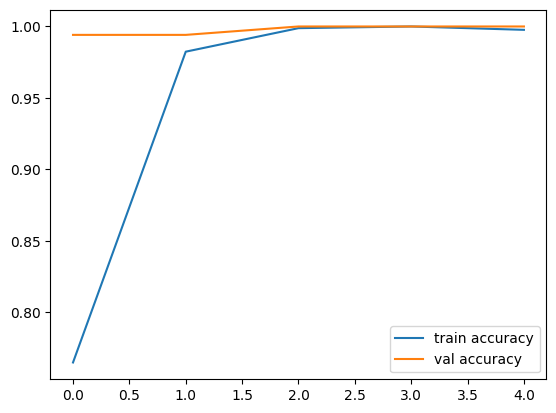

<Figure size 640x480 with 0 Axes>

In [8]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [9]:
## SAVING
import tensorflow as tf
from keras.models import load_model
model.save('resnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
